# PY Analyses

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Manipulation of The Data

In [5]:
%cd 

/Users/kubramahmutonalan/Desktop/Programming_For_Datascience/Final_project


In [77]:
df_all = pd.read_excel("")

In [78]:
df_all

,P.NO,YAS,CINSIYET,M_DURUM,E_DURUM,EKO_DURUM,PSİ_YARDIM_GECMİS,PSİ_YARDIM_SİMDİ,PSİ_YARDIM_İHTİYAC,RTOTOP
0,1,24.0,0,0.0,2,1,1.0,1,0,46.0
1,2,25.0,0,0.0,2,1,0.0,1,0,52.0
2,3,25.0,0,0.0,2,1,1.0,1,0,52.0
3,4,25.0,0,0.0,2,1,0.0,1,0,68.0
4,5,25.0,1,1.0,2,2,1.0,1,1,52.0
...,...,...,...,...,...,...,...,...,...,...
418,420,42.0,1,1.0,2,1,1.0,1,1,32.0
419,421,35.0,0,0.0,2,1,1.0,1,1,40.0
420,422,47.0,0,1.0,2,1,1.0,1,0,42.0
421,423,42.0,1,1.0,2,1,0.0,0,1,27.0


In [79]:
# Change colums name in df_all
column_mapping = {
    'YAS': 'Age',
    'CINSIYET': 'Gender',
    'M_DURUM': 'Relationship Status',
    'E_DURUM':'Educational Level',
    'PSİ_YARDIM_GECMİS': 'Previous Psychological Treatment',
    'PSİ_YARDIM_SİMDİ': 'Current Psychological Treatment',
    'RTOTOP' : 'Rumination_Time0'
}

df_all.rename(columns=column_mapping, inplace=True)


In [80]:
# Change column values 

df_all['Gender'] = df_all['Gender'].replace(0, 'Female')
df_all['Gender'] = df_all['Gender'].replace(1, 'Male')

df_all['Relationship Status'] = df_all['Relationship Status'].replace(0, 'Single')
df_all['Relationship Status'] = df_all['Relationship Status'].replace(1, 'Married')
df_all['Relationship Status'] = df_all['Relationship Status'].replace(2, 'Divorced')

df_all['Educational Level'] = df_all['Educational Level'].replace(1, 'High School')
df_all['Educational Level'] = df_all['Educational Level'].replace(2, 'University - Graduate')

df_all['Previous Psychological Treatment'] = df_all['Previous Psychological Treatment'].replace(0, 'Yes')
df_all['Previous Psychological Treatment'] = df_all['Previous Psychological Treatment'].replace(1, 'No')

df_all['Current Psychological Treatment'] = df_all['Current Psychological Treatment'].replace(0, 'Yes')
df_all['Current Psychological Treatment'] = df_all['Current Psychological Treatment'].replace(1, 'No')



In [81]:
df_all['Age'].min()


18.0

In [82]:
df_all['Age'].max()

60.0

In [83]:
# convert age to categorical variable : 
# Define bin edges
bins = [18, 30, 60]
# Define bin labels
labels = ['18-30', '30-60']
df_all['Age'] = pd.cut(df_all['Age'], bins=bins, labels=labels, include_lowest=True)
print(df_all.head())

   P.NO    Age  Gender Relationship Status      Educational Level  EKO_DURUM  \
0     1  18-30  Female              Single  University - Graduate          1   
1     2  18-30  Female              Single  University - Graduate          1   
2     3  18-30  Female              Single  University - Graduate          1   
3     4  18-30  Female              Single  University - Graduate          1   
4     5  18-30    Male             Married  University - Graduate          2   

  Previous Psychological Treatment Current Psychological Treatment  \
0                               No                              No   
1                              Yes                              No   
2                               No                              No   
3                              Yes                              No   
4                               No                              No   

   PSİ_YARDIM_İHTİYAC  Rumination_Time0  
0                   0              46.0  
1             

In [84]:
#Convert to category
df_all['Age'] = df_all['Age'].astype('category')
df_all['Gender'] = df_all['Gender'].astype('category')
df_all['Relationship Status'] = df_all['Relationship Status'].astype('category')
df_all['Educational Level'] = df_all['Educational Level'].astype('category')
df_all['Previous Psychological Treatment'] = df_all['Previous Psychological Treatment'].astype('category')
df_all['Current Psychological Treatment'] = df_all['Current Psychological Treatment'].astype('category')

In [85]:
# For df_selected ( were selected from df_all)
# List of columns to select
selected_columns = ['Age', 'Gender', 'Relationship Status', 'Educational Level', 'Previous Psychological Treatment', 'Current Psychological Treatment','Rumination_Time0']

# Selecting the specified columns
df_selected = df_all[selected_columns]

# Display the selected columns
print(df_selected.head())

     Age  Gender Relationship Status      Educational Level  \
0  18-30  Female              Single  University - Graduate   
1  18-30  Female              Single  University - Graduate   
2  18-30  Female              Single  University - Graduate   
3  18-30  Female              Single  University - Graduate   
4  18-30    Male             Married  University - Graduate   

  Previous Psychological Treatment Current Psychological Treatment  \
0                               No                              No   
1                              Yes                              No   
2                               No                              No   
3                              Yes                              No   
4                               No                              No   

   Rumination_Time0  
0              46.0  
1              52.0  
2              52.0  
3              68.0  
4              52.0  


In [91]:
##CREATE MADE-UP DATA for Time Points

# Set the seed for reproducibility
np.random.seed(42)

# Number of participants
n_participants = 423

# Generate random initial scores between 40 and 60 for the first time point
initial_scores = np.random.uniform(40, 60, n_participants)

# Create a DataFrame to store the scores
df_scores = pd.DataFrame({
    'Participant': np.arange(1, n_participants + 1),
    'Rumination_Time1': initial_scores
})

# Generate scores for the next time points by decreasing the previous scores
# with some random noise to simulate natural variation in the decrease
for i in range(2, 4):
    previous_scores = df_scores[f'Rumination_Time{i-1}']
    noise = np.random.uniform(-10, 0, n_participants)  # Random decrease between 0 and 10
    new_scores = previous_scores + noise
    new_scores[new_scores < 0] = 0  # Ensure scores don't go below 0
    df_scores[f'Rumination_Time{i}'] = new_scores

print(df_scores.head())


   Participant  Rumination_Time1  Rumination_Time2  Rumination_Time3
0            1         47.490802         42.435005         33.288502
1            2         59.014286         49.589874         49.558616
2            3         54.639879         50.135168         45.157118
3            4         51.973170         46.388475         42.342325
4            5         43.120373         41.997415         32.668179


In [92]:
merged_df = pd.merge(df_scores, df_selected,left_index=True, right_index=True)

In [93]:
merged_df # Created new dataset 

,Participant,Rumination_Time1,Rumination_Time2,Rumination_Time3,Age,Gender,Relationship Status,Educational Level,Previous Psychological Treatment,Current Psychological Treatment,Rumination_Time0
0,1,47.490802,42.435005,33.288502,18-30,Female,Single,University - Graduate,No,No,46.0
1,2,59.014286,49.589874,49.558616,18-30,Female,Single,University - Graduate,Yes,No,52.0
2,3,54.639879,50.135168,45.157118,18-30,Female,Single,University - Graduate,No,No,52.0
3,4,51.973170,46.388475,42.342325,18-30,Female,Single,University - Graduate,Yes,No,68.0
4,5,43.120373,41.997415,32.668179,18-30,Male,Married,University - Graduate,No,No,52.0
...,...,...,...,...,...,...,...,...,...,...,...
418,419,53.450369,50.085743,40.201948,30-60,Male,Married,University - Graduate,No,No,32.0
419,420,55.047491,46.827850,37.552319,30-60,Female,Single,University - Graduate,No,No,40.0
420,421,55.831581,55.442284,49.367220,30-60,Female,Married,University - Graduate,No,No,42.0
421,422,55.792363,47.278990,42.078378,30-60,Male,Married,University - Graduate,Yes,Yes,27.0


In [89]:
# to create df_sample 
df_sample_selected_columns = ['Age', 'Gender', 'Relationship Status', 'Educational Level', 'Previous Psychological Treatment', 'Current Psychological Treatment']

# Selecting the specified columns
df_sample = merged_df[df_sample_selected_columns]

print(df_sample.head())

     Age  Gender Relationship Status      Educational Level  \
0  18-30  Female              Single  University - Graduate   
1  18-30  Female              Single  University - Graduate   
2  18-30  Female              Single  University - Graduate   
3  18-30  Female              Single  University - Graduate   
4  18-30    Male             Married  University - Graduate   

  Previous Psychological Treatment Current Psychological Treatment  
0                               No                              No  
1                              Yes                              No  
2                               No                              No  
3                              Yes                              No  
4                               No                              No  


In [90]:
# to create df_analyses
df_analyses_selected_columns = ['Gender', 'Rumination_Time0', 'Rumination_Time1', 'Rumination_Time2', 'Rumination_Time3']

# Selecting the specified columns
df_analyses = merged_df[df_analyses_selected_columns]

print(df_analyses.head())

   Gender  Rumination_Time0  Rumination_Time1  Rumination_Time2  \
0  Female              46.0         47.490802         42.435005   
1  Female              52.0         59.014286         49.589874   
2  Female              52.0         54.639879         50.135168   
3  Female              68.0         51.973170         46.388475   
4    Male              52.0         43.120373         41.997415   

   Rumination_Time3  
0         33.288502  
1         49.558616  
2         45.157118  
3         42.342325  
4         32.668179  


# 2. Characteristics of the sample 

In [94]:
print(df_sample.head())

     Age  Gender Relationship Status      Educational Level  \
0  18-30  Female              Single  University - Graduate   
1  18-30  Female              Single  University - Graduate   
2  18-30  Female              Single  University - Graduate   
3  18-30  Female              Single  University - Graduate   
4  18-30    Male             Married  University - Graduate   

  Previous Psychological Treatment Current Psychological Treatment  
0                               No                              No  
1                              Yes                              No  
2                               No                              No  
3                              Yes                              No  
4                               No                              No  


In [95]:
missing_values_sample = df_sample.isnull().sum()
print("Missing values per column:\n", missing_values_sample)

Missing values per column:
 Age                                 56
Gender                               0
Relationship Status                  1
Educational Level                    0
Previous Psychological Treatment     1
Current Psychological Treatment      0
dtype: int64


In [145]:
#df_descriptive = df_descriptive.dropna()

In [96]:
rows, columns = df_sample.shape
print(rows, columns)

423 6


In [97]:
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Age                               367 non-null    category
 1   Gender                            423 non-null    category
 2   Relationship Status               422 non-null    category
 3   Educational Level                 423 non-null    category
 4   Previous Psychological Treatment  422 non-null    category
 5   Current Psychological Treatment   423 non-null    category
dtypes: category(6)
memory usage: 3.3 KB
None


In [98]:
# For Age categories calculate counts and percentage 

# count of each category
Age_counts= df_sample['Age'].value_counts(dropna=False)

# Percentage of each category
Age_percentage = df_sample['Age'].value_counts(normalize=True, dropna=False) * 100

# Combine count and percentage into a single DataFrame
Age_summary = pd.DataFrame({
    'Count': Age_counts,
    'Percentage': Age_percentage
    
})

print (Age_summary)

       Count  Percentage
Age                     
18-30    322   76.122931
NaN       56   13.238771
30-60     45   10.638298


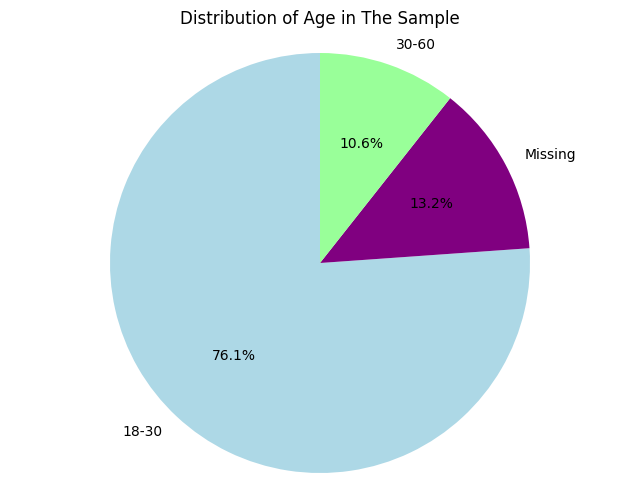

In [99]:
# For Piechart - age 

plt.figure(figsize=(8, 6))
custom_colors = ['#ADD8E6', '#800080', '#99ff99']
custom_labels = ['18-30', 'Missing', '30-60'] # this order according to age_summary variables 
plt.pie(Age_counts, labels=custom_labels, autopct='%1.1f%%', startangle= 90, colors=custom_colors)
plt.title('Distribution of Age in The Sample')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig('age_distribution_pie_chart.png', format='png')

plt.show()

In [100]:
# For Gender categories calculate counts and percentage 

# count of each category
Gender_counts= df_sample['Gender'].value_counts(dropna=False)

# Percentage of each category
Gender_percentage = df_sample['Gender'].value_counts(normalize=True, dropna=False) * 100

# Combine count and percentage into a single DataFrame
Gender_summary = pd.DataFrame({
    'Count': Gender_counts,
    'Percentage': Gender_percentage
    
})

print (Gender_summary)

        Count  Percentage
Gender                   
Female    240   56.737589
Male      183   43.262411


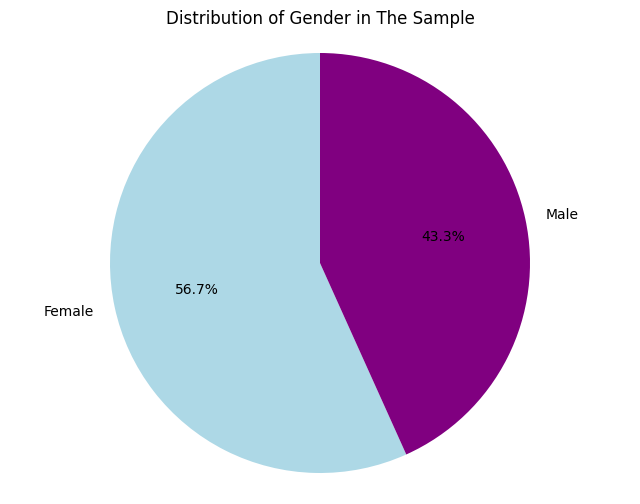

In [101]:
# For Piechart - Gender 
plt.figure(figsize=(8, 6))
custom_colors = ['#ADD8E6', '#800080']
custom_labels = ['Female', 'Male']
plt.pie(Gender_counts, labels=custom_labels, autopct='%1.1f%%', startangle= 90, colors=custom_colors)
plt.title('Distribution of Gender in The Sample')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig('piegender_chart.png')

plt.show()

In [102]:
# For Relationship categories calculate counts and percentage 

# count of each category
R_counts= df_sample['Relationship Status'].value_counts(dropna=False)

# Percentage of each category
R_percentage = df_sample['Relationship Status'].value_counts(normalize=True, dropna=False) * 100

# Combine count and percentage into a single DataFrame
R_summary = pd.DataFrame({
    'Count': R_counts,
    'Percentage': R_percentage
    
})

print (R_summary)

                     Count  Percentage
Relationship Status                   
Single                 362   85.579196
Married                 54   12.765957
Divorced                 6    1.418440
NaN                      1    0.236407


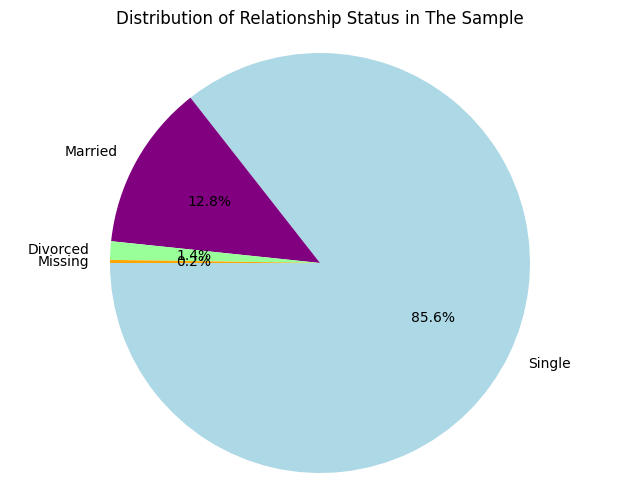

In [103]:
# For Piechart - Relationship 
plt.figure(figsize=(8, 6))
custom_colors = ['#ADD8E6', '#800080', '#99ff99', '#FFA500']
custom_labels = ['Single', 'Married', 'Divorced', 'Missing']
plt.pie(R_counts, labels=custom_labels, autopct='%1.1f%%', startangle= 180, colors=custom_colors)
plt.title('Distribution of Relationship Status in The Sample')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig('pieR_chart.png')

plt.show()

In [104]:
# For Education categories calculate counts and percentage 

# count of each category
E_counts= df_sample['Educational Level'].value_counts(dropna=False)

# Percentage of each category
E_percentage = df_sample['Educational Level'].value_counts(normalize=True, dropna=False) * 100

# Combine count and percentage into a single DataFrame
E_summary = pd.DataFrame({
    'Count': E_counts,
    'Percentage': E_percentage
    
})

print (E_summary)

                       Count  Percentage
Educational Level                       
University - Graduate    413   97.635934
High School               10    2.364066


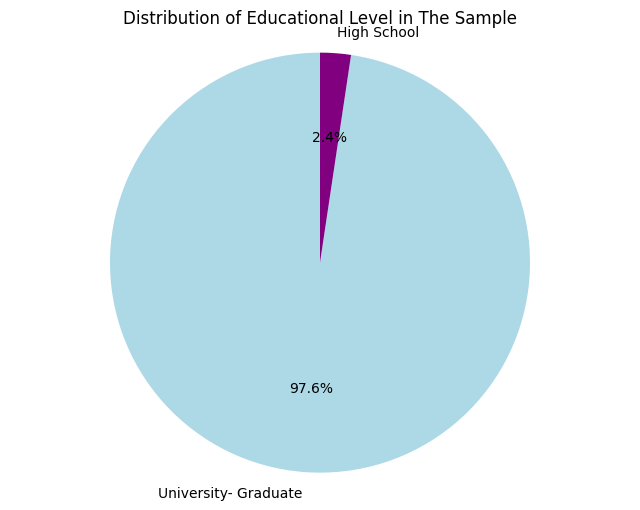

In [105]:
# For Piechart - Education 

plt.figure(figsize=(8, 6))
custom_colors = ['#ADD8E6', '#800080']
custom_labels = ['University- Graduate', 'High School']
plt.pie(E_counts, labels=custom_labels, autopct='%1.1f%%', startangle= 90, colors=custom_colors)
plt.title('Distribution of Educational Level in The Sample')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig('pieE_chart.png')

plt.show()

In [106]:
# For Previous Psyc Tre categories calculate counts and percentage 

# count of each category
PPT_counts= df_sample['Previous Psychological Treatment'].value_counts(dropna=False)

# Percentage of each category
PPT_percentage = df_sample['Previous Psychological Treatment'].value_counts(normalize=True, dropna=False) * 100

# Combine count and percentage into a single DataFrame
PPT_summary = pd.DataFrame({
    'Count': PPT_counts,
    'Percentage': PPT_percentage
    
})

print (PPT_summary)

                                  Count  Percentage
Previous Psychological Treatment                   
No                                  335   79.196217
Yes                                  87   20.567376
NaN                                   1    0.236407


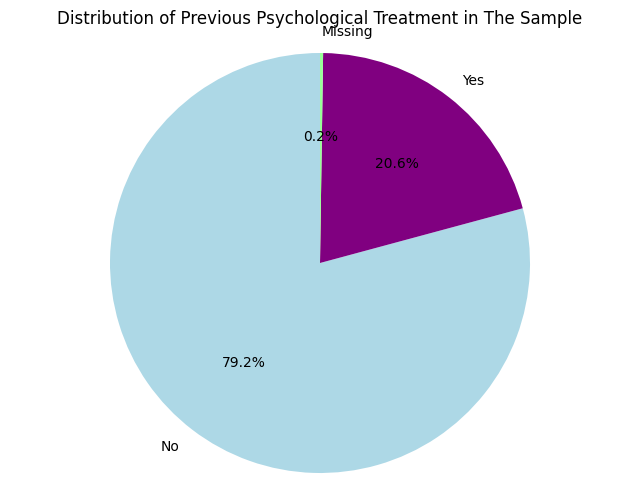

In [107]:
# For Piechart - Previous Psyc Tre 
plt.figure(figsize=(8, 6))
custom_colors = ['#ADD8E6', '#800080', '#99ff99']
custom_labels = ['No', 'Yes', 'Missing']
plt.pie(PPT_counts, labels=custom_labels, autopct='%1.1f%%', startangle= 90, colors=custom_colors)
plt.title('Distribution of Previous Psychological Treatment in The Sample')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig('piePR_chart.png')

plt.show()

In [108]:
# For Now Psyc Tre categories calculate counts and percentage 

# count of each category
CPT_counts= df_sample['Current Psychological Treatment'].value_counts(dropna=False)

# Percentage of each category
CPT_percentage = df_sample['Current Psychological Treatment'].value_counts(normalize=True, dropna=False) * 100

# Combine count and percentage into a single DataFrame
CPT_summary = pd.DataFrame({
    'Count': CPT_counts,
    'Percentage': CPT_percentage
    
})

print (CPT_summary)

                                 Count  Percentage
Current Psychological Treatment                   
No                                 389   91.962175
Yes                                 34    8.037825


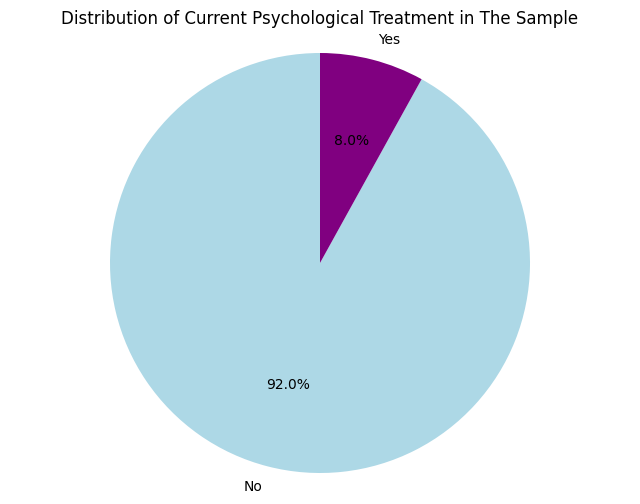

In [109]:
# For Piechart - Previous Psyc Tre 
plt.figure(figsize=(8, 6))
custom_colors = ['#ADD8E6', '#800080']
custom_labels = ['No', 'Yes']
plt.pie(CPT_counts, labels=custom_labels, autopct='%1.1f%%', startangle= 90, colors=custom_colors)
plt.title('Distribution of Current Psychological Treatment in The Sample')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig('pieCT_chart.png')

plt.show()

# 3. Analyses

In [110]:
print(df_analyses.head())

   Gender  Rumination_Time0  Rumination_Time1  Rumination_Time2  \
0  Female              46.0         47.490802         42.435005   
1  Female              52.0         59.014286         49.589874   
2  Female              52.0         54.639879         50.135168   
3  Female              68.0         51.973170         46.388475   
4    Male              52.0         43.120373         41.997415   

   Rumination_Time3  
0         33.288502  
1         49.558616  
2         45.157118  
3         42.342325  
4         32.668179  


In [111]:
#Checking missing values 
missing_values_analyses = df_analyses.isnull().sum()
print("Missing values per column:\n", missing_values_analyses)

Missing values per column:
 Gender              0
Rumination_Time0    0
Rumination_Time1    0
Rumination_Time2    0
Rumination_Time3    0
dtype: int64


In [112]:
rows, columns = df_analyses.shape
print(rows, columns)

423 5


In [113]:
print(df_analyses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Gender            423 non-null    category
 1   Rumination_Time0  423 non-null    float64 
 2   Rumination_Time1  423 non-null    float64 
 3   Rumination_Time2  423 non-null    float64 
 4   Rumination_Time3  423 non-null    float64 
dtypes: category(1), float64(4)
memory usage: 13.9 KB
None


## 3.1. Rumination Levels by Gender 

In [114]:
Gender_counts = df_analyses['Gender'].value_counts()
print(Gender_counts)

Gender
Female    240
Male      183
Name: count, dtype: int64


In [115]:
gender_grouped_agg = df_analyses.groupby('Gender').agg({
    'Rumination_Time0': ['count','mean', 'std', 'max', 'min']})

print(gender_grouped_agg)

       Rumination_Time0                                  
                  count       mean        std   max   min
Gender                                                   
Female              240  54.294253  10.666763  81.0  23.0
Male                183  46.618252  11.735250  74.0  22.0


/var/folders/z_/0n37lkj15xd9ghrxshk69_qc0000gn/T/ipykernel_87183/4292478807.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_grouped_agg = df_analyses.groupby('Gender').agg({


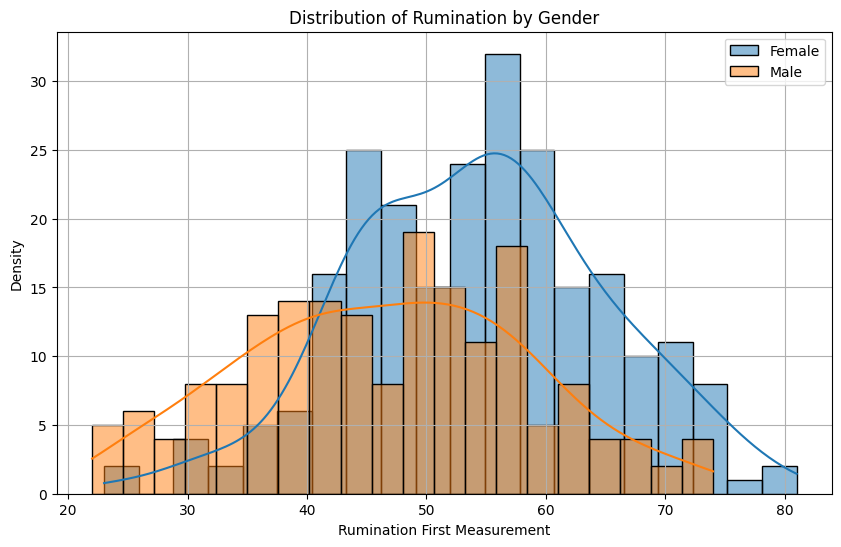

In [116]:
# Plot histogram with density line
plt.figure(figsize=(10, 6))

# Iterate over each unique 'Gender' value
for gender in gender_grouped_agg.index:
    # Get 'Rumination' values for the current 'Gender' group
    rumination_values = df_analyses[df_analyses['Gender'] == gender]['Rumination_Time0']
    # Plot histogram for 'Rumination' values
    sns.histplot(rumination_values, bins=20, kde=True, label=gender)

plt.title('Distribution of Rumination by Gender')
plt.xlabel('Rumination First Measurement')
plt.ylabel('Density')
plt.legend()
plt.grid(True)



plt.savefig('histoR_dist.png')

plt.show()

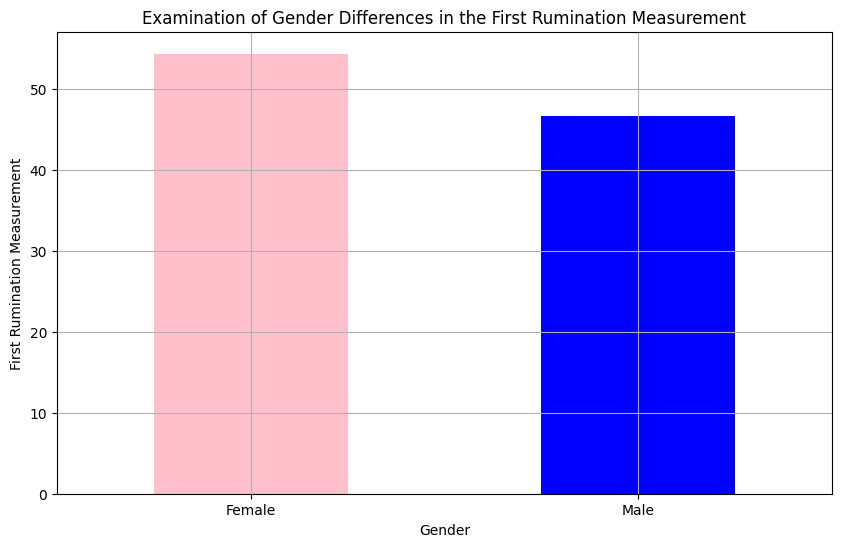

In [468]:
# Plotting the bar plot
gender_means = gender_grouped_agg[('Rumination_Time0', 'mean')]

# Creating the bar plot
plt.figure(figsize=(10, 6))
gender_means.plot(kind='bar', color=['pink', 'blue'])

plt.title('Examination of Gender Differences in the First Rumination Measurement')
plt.xlabel('Gender')
plt.ylabel('First Rumination Measurement')
plt.grid(True)
plt.xticks(rotation=0)  # Keep the x labels horizontal

plt.savefig('barR_first.png')

plt.show()



## 3.2. Rumination Levels over Time 

In [117]:
df_analyses

,Gender,Rumination_Time0,Rumination_Time1,Rumination_Time2,Rumination_Time3
0,Female,46.0,47.490802,42.435005,33.288502
1,Female,52.0,59.014286,49.589874,49.558616
2,Female,52.0,54.639879,50.135168,45.157118
3,Female,68.0,51.973170,46.388475,42.342325
4,Male,52.0,43.120373,41.997415,32.668179
...,...,...,...,...,...
418,Male,32.0,53.450369,50.085743,40.201948
419,Female,40.0,55.047491,46.827850,37.552319
420,Female,42.0,55.831581,55.442284,49.367220
421,Male,27.0,55.792363,47.278990,42.078378


In [119]:
# I will add Gender after transforming the data to log format  
s_c = df_analyses['Gender']
# Duplicate the column vertically 5 times under the same name
Gender= pd.concat([s_c] * 4, ignore_index=True)

In [26]:
Gender

0       Female
1       Female
2       Female
3       Female
4         Male
         ...  
2110      Male
2111    Female
2112    Female
2113      Male
2114      Male
Name: Gender, Length: 2115, dtype: category
Categories (2, object): ['Female', 'Male']

In [120]:
df_analyses.drop(columns=['Gender'], inplace=True)

/var/folders/z_/0n37lkj15xd9ghrxshk69_qc0000gn/T/ipykernel_87183/3298686560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyses.drop(columns=['Gender'], inplace=True)


In [121]:
# Melt the data frame into a long format
long_df = pd.melt(df_analyses, var_name='TimePoint', value_name='Rumination')

In [122]:
long_df

,TimePoint,Rumination
0,Rumination_Time0,46.000000
1,Rumination_Time0,52.000000
2,Rumination_Time0,52.000000
3,Rumination_Time0,68.000000
4,Rumination_Time0,52.000000
...,...,...
1687,Rumination_Time3,40.201948
1688,Rumination_Time3,37.552319
1689,Rumination_Time3,49.367220
1690,Rumination_Time3,42.078378


In [123]:
long_df['Gender'] = Gender

In [124]:
long_df

,TimePoint,Rumination,Gender
0,Rumination_Time0,46.000000,Female
1,Rumination_Time0,52.000000,Female
2,Rumination_Time0,52.000000,Female
3,Rumination_Time0,68.000000,Female
4,Rumination_Time0,52.000000,Male
...,...,...,...
1687,Rumination_Time3,40.201948,Male
1688,Rumination_Time3,37.552319,Female
1689,Rumination_Time3,49.367220,Female
1690,Rumination_Time3,42.078378,Male


In [125]:
Time_counts = long_df['TimePoint'].value_counts()
print(Time_counts)

TimePoint
Rumination_Time0    423
Rumination_Time1    423
Rumination_Time2    423
Rumination_Time3    423
Name: count, dtype: int64


In [126]:
## Group by 'TimePoint' and aggregate statistics

time_grouped_agg = long_df.groupby('TimePoint')['Rumination'].agg(['count','mean', 'std','max', 'min'])

print(time_grouped_agg)

                  count       mean        std        max        min
TimePoint                                                          
Rumination_Time0    423  50.973430  11.761398  81.000000  22.000000
Rumination_Time1    423  49.939424   5.890277  59.810103  40.101232
Rumination_Time2    423  44.910392   6.442930  59.094837  30.545538
Rumination_Time3    423  39.920289   7.115989  57.662104  21.788413


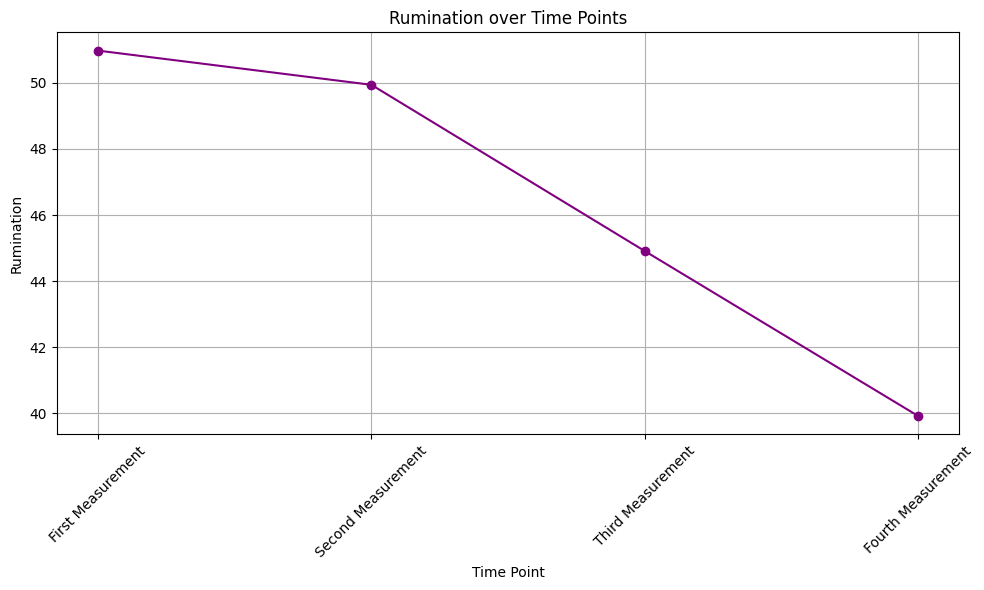

In [127]:
new_labels = ['First Measurement', 'Second Measurement', 'Third Measurement', 'Fourth Measurement']
# Plotting line plot for mean values
plt.figure(figsize=(10, 6))
plt.plot(time_grouped_agg.index, time_grouped_agg['mean'], marker='o', linestyle='-', color = 'purple')
plt.title('Rumination over Time Points')
plt.xlabel('Time Point')
plt.ylabel('Rumination')
plt.grid(True)
plt.xticks(ticks=time_grouped_agg.index, labels=new_labels, rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()

plt.savefig('lineR_overtime.png')

plt.show()

## 3.3 Means over Time by Gender 

In [129]:
combination_counts = long_df.groupby(['Gender', 'TimePoint']).size().reset_index(name='Counts')

print("\nCount of each combination of Category and Subcategory:")
print(combination_counts)


Count of each combination of Category and Subcategory:
   Gender         TimePoint  Counts
0  Female  Rumination_Time0     240
1  Female  Rumination_Time1     240
2  Female  Rumination_Time2     240
3  Female  Rumination_Time3     240
4    Male  Rumination_Time0     183
5    Male  Rumination_Time1     183
6    Male  Rumination_Time2     183
7    Male  Rumination_Time3     183


/var/folders/z_/0n37lkj15xd9ghrxshk69_qc0000gn/T/ipykernel_87183/1449612185.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combination_counts = long_df.groupby(['Gender', 'TimePoint']).size().reset_index(name='Counts')


In [130]:
grouped_aggyy = long_df.groupby(['Gender', 'TimePoint']).agg({
    'Rumination': ['mean', 'std', 'max', 'min']
})
print("\nMultiple aggregates for each group:")

print(grouped_aggyy)




Multiple aggregates for each group:
                        Rumination                                 
                              mean        std        max        min
Gender TimePoint                                                   
Female Rumination_Time0  54.294253  10.666763  81.000000  23.000000
       Rumination_Time1  50.079014   6.062072  59.801077  40.101232
       Rumination_Time2  44.776639   6.620414  59.094837  30.550773
       Rumination_Time3  39.569692   7.468546  56.677222  21.788413
Male   Rumination_Time0  46.618252  11.735250  74.000000  22.000000
       Rumination_Time1  49.756355   5.668349  59.810103  40.287870
       Rumination_Time2  45.085806   6.216126  59.018522  30.545538
       Rumination_Time3  40.380089   6.617297  57.662104  25.430890


/var/folders/z_/0n37lkj15xd9ghrxshk69_qc0000gn/T/ipykernel_87183/261430892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_aggyy = long_df.groupby(['Gender', 'TimePoint']).agg({


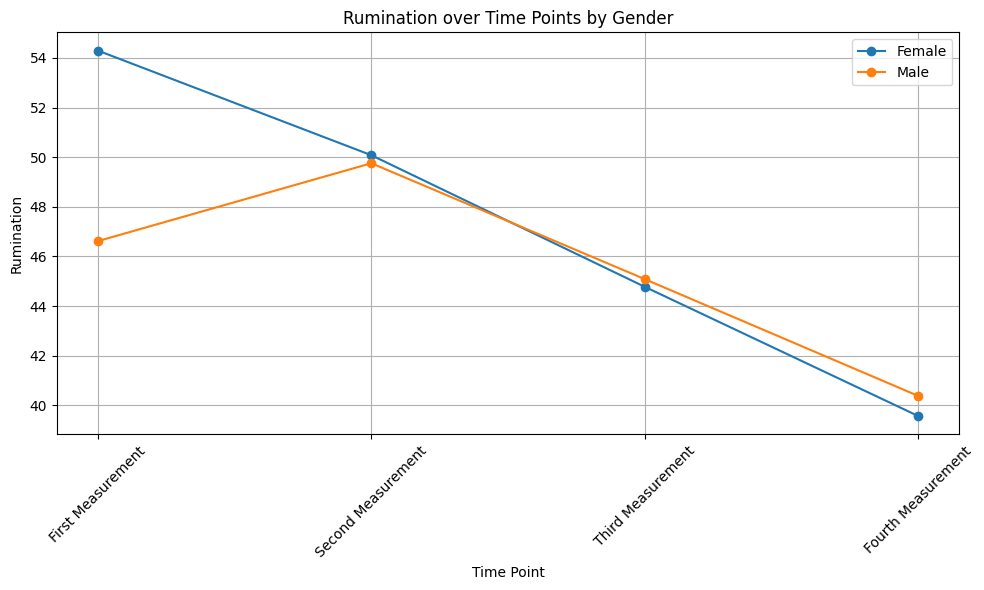

In [131]:
# Plotting line plot for mean values with separate lines for each gender
plt.figure(figsize=(10, 6))

for gender in long_df['Gender'].unique():
    gender_data = long_df[long_df['Gender'] == gender]
    time_grouped_agg = gender_data.groupby('TimePoint')['Rumination'].agg(['mean']).reset_index()
    plt.plot(time_grouped_agg['TimePoint'], time_grouped_agg['mean'], marker='o', linestyle='-', label=gender)

plt.title('Rumination over Time Points by Gender')
plt.xlabel('Time Point')
plt.ylabel('Rumination')
plt.grid(True)
plt.xticks(ticks=time_grouped_agg['TimePoint'], labels=new_labels, rotation=45) # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()

plt.savefig('lineR_genderovertime.png')

plt.show()